# 1. Data Cleaning:

In [15]:
import pandas as pd
df = pd.read_csv("./train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Check for missing values.

In [19]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Gender, Married and Self_Employed : fill with mode (these are categorical)
### Dependent: Check the no. of dependents, Fill with mode or '0' if most people have no dependents
### LoanAmount: Fill with median (loan values are often skewed).
### Loan_Amount_Term: mode (most loan have standard terms like 360 months and discrete value->mode works).
### Credit_History: with mode assuming the missing values are MCAR -> Missing Completely At Random.

In [20]:
for col in ['Gender','Married','Self_Employed','Dependents','Loan_Amount_Term','Credit_History']:
    df[col].fillna(df[col].mode()[0])

df['LoanAmount'].fillna(df['LoanAmount'].median())
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# 2. descriptive statistical analysis:

## Summary statistics 

In [24]:
import numpy as np
import statistics as st
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
df['LoanAmount'].fillna(df['LoanAmount'].median())

print("Mean:")
print('ApplicantIncome ', st.mean(df['ApplicantIncome']))
print('CoapplicantIncome ', st.mean(df['CoapplicantIncome']))
print('LoanAmount ', st.mean(df['LoanAmount']))

print("\nMedian:")
print('ApplicantIncome ', st.median(df['ApplicantIncome']))
print('CoapplicantIncome ', st.median(df['CoapplicantIncome']))
print('LoanAmount ', st.median(df['LoanAmount']))

print("\nMode:")
print('ApplicantIncome ', st.mode(df['ApplicantIncome']))
print('CoapplicantIncome ', st.mode(df['CoapplicantIncome']))
print('LoanAmount ', st.mode(df['LoanAmount']))

print("\nStandard Deviation:")
print('ApplicantIncome ', st.stdev(df['ApplicantIncome']))
print('CoapplicantIncome ', st.stdev(df['CoapplicantIncome']))
print('LoanAmount ', st.stdev(df['LoanAmount']))

#min
#max
print("\nMax:")
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].max())

print("\nMin:")
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].min())


Mean:
ApplicantIncome  5403.459283387622
CoapplicantIncome  1621.245798027101
LoanAmount  145.75244299674267

Median:
ApplicantIncome  3812.5
CoapplicantIncome  1188.5
LoanAmount  128.0

Mode:
ApplicantIncome  2500
CoapplicantIncome  0.0
LoanAmount  128.0

Standard Deviation:
ApplicantIncome  6109.041673387178
CoapplicantIncome  2926.2483692241885
LoanAmount  84.10723338042614

Max:
ApplicantIncome      81000.0
CoapplicantIncome    41667.0
LoanAmount             700.0
dtype: float64

Min:
ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             9.0
dtype: float64


## Interpreting the central tendency and spread of key variables:
### Applicant incomes vary widely  the mean is much higher than the median, showing a right-skewed distribution (a few applicants earn very high incomes, pulling the average up).The large standard deviation confirms high income inequality among applicants.
### Many coapplicants likely have no income (mode = 0).Again, the mean > median, showing positive skewness  a few coapplicants contribute large amounts.Spread is also high, implying income disparity among coapplicants.
### Loan amounts are moderately variable but also right-skewed — most loans are around ₹120–₹150k, but a few are much larger.The mean being higher than the median confirms this skewness.

# 3. Visualizing the data: 

## 1. Histogram

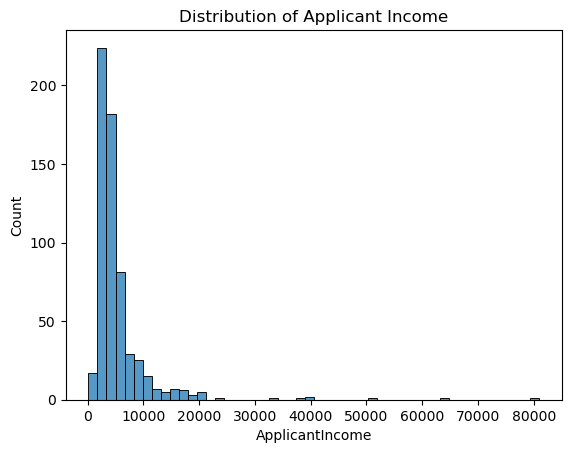

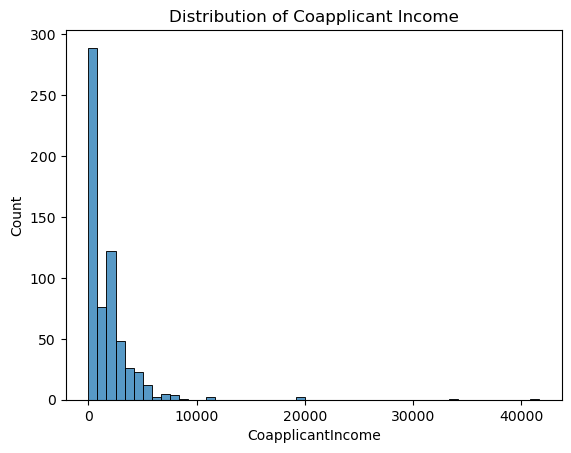

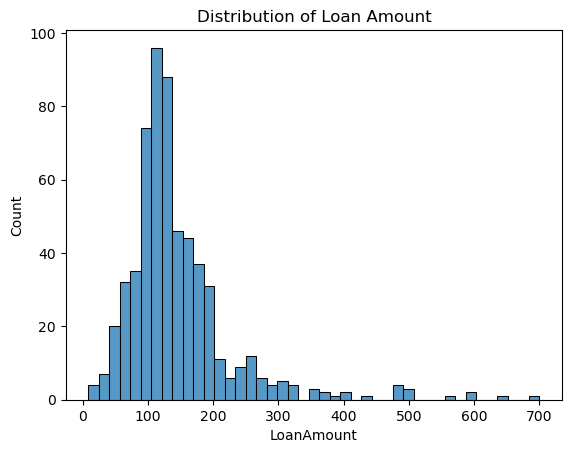

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['ApplicantIncome'])
plt.title('Distribution of Applicant Income')
plt.show()


sns.histplot(df['CoapplicantIncome'])
plt.title('Distribution of Coapplicant Income')
plt.show()


sns.histplot(df['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.show()


### Distribution of Applicant Income: The histogram shows that the majority of applicants have an income on the lower end of the scale, with a long tail extending to higher incomes. This indicates that most applicants have a modest income, while a small number of applicants have a very high income. This type of distribution is often referred to as a right-skewed distribution.
### Distribution of Co-applicant Income: The histogram for co-applicant income is similar to the applicant income distribution, with a large number of co-applicants having a low income and a smaller number having a high income. Many co-applicants have an income of zero.
### Distribution of Loan Amount: The distribution of loan amounts is also right-skewed, but it is less pronounced than the income distributions. The highest frequency of loan amounts appears to be in the lower to middle range, with a few outliers for very high loan amounts. This suggests that while most loans are for a moderate amount, some individuals are approved for much larger sums

# 4. Check for Normality: Q-Q plot
### Q–Q (Quantile–Quantile) Plot compares the quantiles of your data with the quantiles of a normal distribution.

### If your data is normally distributed, the points will lie roughly along the 45° diagonal line.

### If your data deviates from normal:

>Points curve upward → right-skewed (long right tail)

>Points curve downward → left-skewed (long left tail)

>Points deviate heavily at ends → heavy-tailed distribution (outliers)

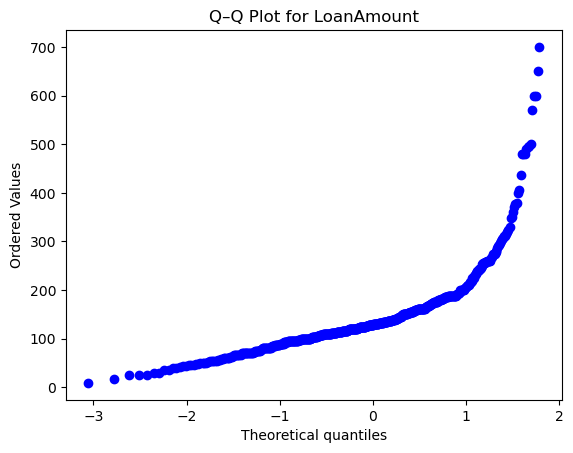

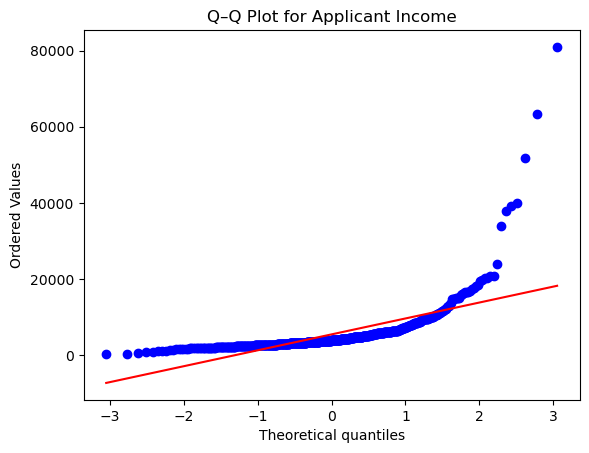

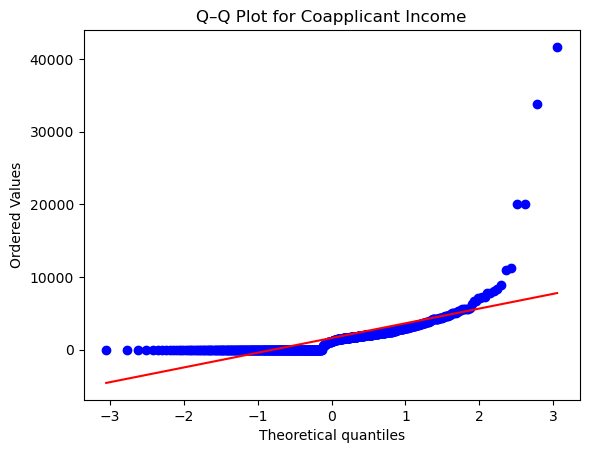

In [11]:
import scipy.stats as stats 
stats.probplot(df['LoanAmount'], dist="norm", plot=plt)
plt.title("Q–Q Plot for LoanAmount")
plt.show()

stats.probplot(df['ApplicantIncome'], dist="norm", plot=plt)
plt.title("Q–Q Plot for Applicant Income")
plt.show()

stats.probplot(df['CoapplicantIncome'], dist="norm", plot=plt)
plt.title("Q–Q Plot for Coapplicant Income")
plt.show()

### The Q-Q plot for "LoanAmount" shows that the data is not normally distributed, as the points deviate significantly from the straight line, especially at the higher quantiles.
### The Q-Q plot for "Applicant Income" indicates that the data is not normally distributed, with a clear upward curve away from the straight line, suggesting a right-skewed distribution.
### The Q-Q plot for "Coapplicant Income" also shows a non-normal distribution, with the points deviating from the straight line in a pattern similar to the "Applicant Income" plot.
### All three plots show that the distributions of "LoanAmount," "Applicant Income," and "Coapplicant Income" are not normal, as the data points do not follow the theoretical straight line.

# 5. Constructing a confidence interval for the mean of a selected numeric feature at a 95% level.

In [29]:
loan_amount = df['LoanAmount']
n = len(loan_amount)
mean = np.mean(loan_amount)
std = np.std(loan_amount, ddof=1)  # sample std dev

# 95% confidence interval
confidence = 0.95
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

margin_of_error = t_crit * (std / np.sqrt(n))
lower = mean - margin_of_error
upper = mean + margin_of_error

print(f"Mean LoanAmount: {mean:.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Applicant_income = df['ApplicantIncome']
n = len(Applicant_income)
mean = np.mean(Applicant_income)
std = np.std(Applicant_income, ddof=1)
margin_of_error = t_crit * (std / np.sqrt(n))
lower = mean - margin_of_error
upper = mean + margin_of_error
print("\n")
print(f"Mean Applicant Income: {mean:.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Coapplicant_income = df['CoapplicantIncome']
n = len(Coapplicant_income)
mean = np.mean(Coapplicant_income)
std = np.std(Coapplicant_income, ddof=1)
margin_of_error = t_crit * (std / np.sqrt(n))
lower = mean - margin_of_error
upper = mean + margin_of_error
print("\n")
print(f"Mean Coapplicant Income: {mean:.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")



Mean LoanAmount: 145.75
95% Confidence Interval: (139.09, 152.42)


Mean Applicant Income: 5403.46
95% Confidence Interval: (4919.29, 5887.63)


Mean Coapplicant Income: 1621.25
95% Confidence Interval: (1389.33, 1853.16)


### The sample mean loan amount is ₹145.75 thousand (or ₹145,750).
### At a 95% confidence level, we estimate that the true population mean loan amount lies between ₹139.09 thousand and ₹152.42 thousand.
### If we were to repeatedly sample applicants and compute their mean loan amounts, 95% of those confidence intervals would contain the true average loan amount.

# 6. Hypothesis testing:

## Loan Amount: 
### Hypothesis:
#### Null hypothesis(H₀): Null Hypothesis (H₀): μ = 150
> The true mean loan amount is ₹150K.
#### Alternative Hypothesis (H₁): μ ≠ 150
> The true mean loan amount is not ₹150K.
### Sgnificance level
> α = 0.05 (5%)

In [31]:
mu_0 = 150
t_stat, p_val = stats.ttest_1samp(df['LoanAmount'].dropna(), mu_0)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -1.2513824327583563
P-value: 0.21127232153721262


## Since p-value (0.211) > α (0.05),we fail to reject the null hypothesis.
## There is no statistically significant evidence to suggest that the true mean LoanAmount differs from ₹150 thousand.
## the observed difference (₹145.75K vs ₹150K) is small enough to be explained by normal sampling variation , it is not statistically meaningful

# 6.   Fit a linear regression model to predict the target variable using selected predictor variables. Evaluate the model’s performance by reporting RMSE, MSE, and R² scores, and visualize the results by plotting the predicted versus actual values
## predicting the LoanAmount (target variable) based on key applicant and loan-related predictors:
>ApplicantIncome
>CoapplicantIncome
>Loan_Amount_Term
>Credit_History

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors (X) and target (y)
X = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']]
y = df['LoanAmount']

# Drop rows with missing values for simplicity
X = X.dropna()
y = y.loc[X.index]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 3890.0020058684004
Root Mean Squared Error (RMSE): 62.369880598477984
R² Score: 0.4886379919101913


## The R² = 0.49 means that around half of the variability in loan amounts can be explained by the predictors (income, term, credit history).This suggests a moderate fit — not poor, but there’s still a lot of variation unaccounted for (e.g., property type, education, loan purpose, etc.).
## The RMSE = 62.37 (thousand rupees) indicates the model’s average prediction error.For instance, if the average loan is around ₹145K, an error of ₹62K means predictions can swing ±40% around the mean.
## The MSE is just RMSE squared — it’s less interpretable in units, but good for comparing models quantitatively.